<a href="https://colab.research.google.com/github/EmmanuelECCI/tensorflow_studies/blob/main/Handwritten_Numbers_Tensorflow_CNN_VS_ANN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.engine.training import optimizer
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

***Dataset_Handwritten__numbers***

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


**Data shapes**

In [ ]:
print(f'Shape_X_train: {X_train.shape}  Shape_Y_train: {y_train.shape}')
print(f'Shape_X_test: {X_test.shape}  Shape_Y_test: {y_test.shape}')

Shape_X_train: (60000, 28, 28)  Shape_Y_train: (60000,)
Shape_X_test: (10000, 28, 28)  Shape_Y_test: (10000,)


In [ ]:
from keras.engine.training import optimizer
ann_without_normalizing = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback_ann_without_normalizing = tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

ann_without_normalizing.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
ann_without_normalizing.fit(X_train, y_train, epochs=10,callbacks=[tb_callback_ann_without_normalizing])

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 2.8234 - accuracy: 0.8496
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4304 - accuracy: 0.8994
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3090 - accuracy: 0.9229
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2591 - accuracy: 0.9351
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2273 - accuracy: 0.9420
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2176 - accuracy: 0.9455
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1991 - accuracy: 0.9498
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1947 - accuracy: 0.9517
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1875 - accuracy: 0.9540
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.

In [ ]:
ann_without_normalizing.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2739 - accuracy: 0.9453


[0.27388736605644226, 0.9452999830245972]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

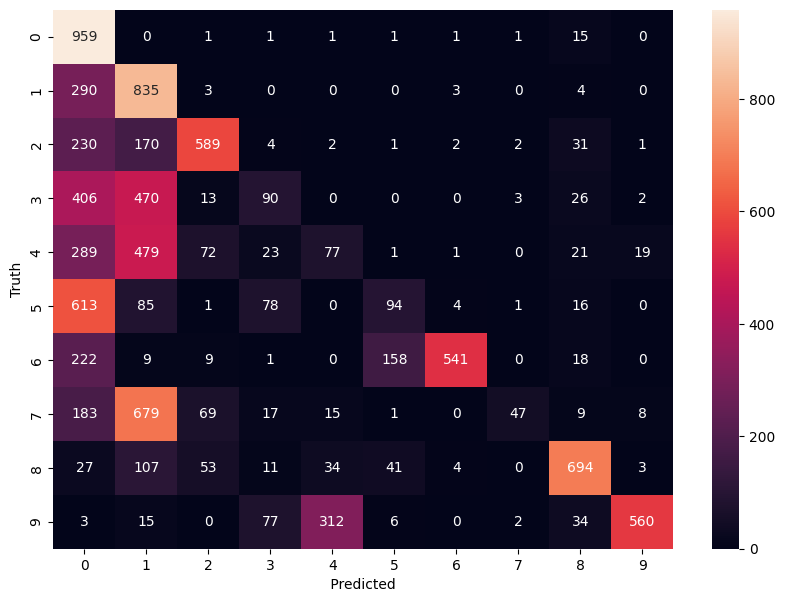

In [ ]:
y_predicted_ann_without_normalizing = ann_without_normalizing.predict(X_test)
y_predicted_labels_ann_without_normalizing = [np.argmax(i) for i in y_predicted_ann_without_normalizing]
cm_ann_without_normalizing = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_ann_without_normalizing)

import seaborn as sn
plt.figure(figsize =(10, 7))
sn.heatmap(cm_ann_without_normalizing, annot=True, fmt='d' )
plt.xlabel(' Predicted ')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
print("Classification Report: \n", classification_report(y_test, y_predicted_labels_ann_without_normalizing))

Classification Report: 
               precision    recall  f1-score   support

           0       0.30      0.98      0.46       980
           1       0.29      0.74      0.42      1135
           2       0.73      0.57      0.64      1032
           3       0.30      0.09      0.14      1010
           4       0.17      0.08      0.11       982
           5       0.31      0.11      0.16       892
           6       0.97      0.56      0.71       958
           7       0.84      0.05      0.09      1028
           8       0.80      0.71      0.75       974
           9       0.94      0.56      0.70      1009

    accuracy                           0.45     10000
   macro avg       0.57      0.44      0.42     10000
weighted avg       0.57      0.45      0.42     10000



**Normalizing values**

*This have shown better results*

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
from keras.engine.training import optimizer
ann= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback_ann = tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
ann.fit(X_train, y_train, epochs=10,callbacks=[tb_callback_ann])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2719 - accuracy: 0.9233
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1250 - accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0874 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0658 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0522 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0427 - accuracy: 0.9864
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0342 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0287 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0240 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.019

In [ ]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0911 - accuracy: 0.9755


[0.09112972021102905, 0.9754999876022339]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

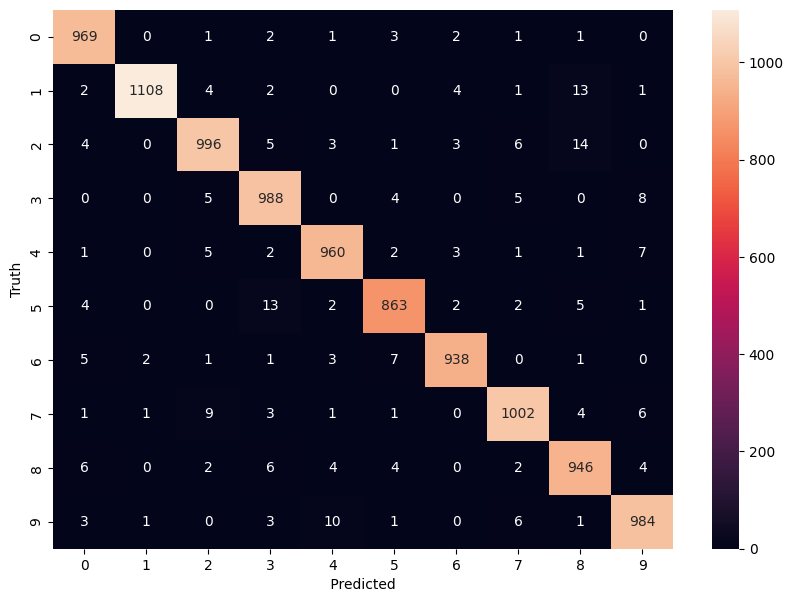

In [ ]:
y_predicted_ann = ann.predict(X_test)
y_predicted_labels_ann = [np.argmax(i) for i in y_predicted_ann]
ann = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_ann)

import seaborn as sn
plt.figure(figsize =(10, 7))
sn.heatmap(ann, annot=True, fmt='d' )
plt.xlabel(' Predicted ')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
print("Classification Report: \n", classification_report(y_test, y_predicted_labels_ann))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       1.00      0.98      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
cnn_numbers = models.Sequential([
    
    #cnn
    layers.Conv2D(filters=32 ,kernel_size= (3, 3), activation='relu', input_shape=(28, 28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64 ,kernel_size= (3, 3), activation='relu' ),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

tb_callback_cnn = tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

cnn_numbers.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
            )

cnn_numbers.fit(X_train, y_train, epochs=10, callbacks=[tb_callback_cnn])

Epoch 1/10
1875/1875 [==============================] - 64s 33ms/step - loss: 0.1437 - accuracy: 0.9564
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0482 - accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0327 - accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0238 - accuracy: 0.9923
Epoch 5/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0179 - accuracy: 0.9941
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0148 - accuracy: 0.9953
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0114 - accuracy: 0.9965
Epoch 8/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0092 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0077 - accuracy: 0.9973
Epoch 10/10
1875/1875 [==============================] - 59s 31m

In [ ]:
cnn_numbers.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0442 - accuracy: 0.9902


[0.044208064675331116, 0.9901999831199646]

In [ ]:
y_pred_cnn_numbers= cnn_numbers.predict(X_test)
y_pred_classes_cnn_numbers = [np.argmax(element) for element in y_pred_cnn_numbers]
print("Classification Report: \n", classification_report(y_test, y_pred_classes_cnn_numbers))

313/313 [==============================] - 4s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.98      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



313/313 [==============================] - 4s 14ms/step


Text(95.72222222222221, 0.5, 'Truth')

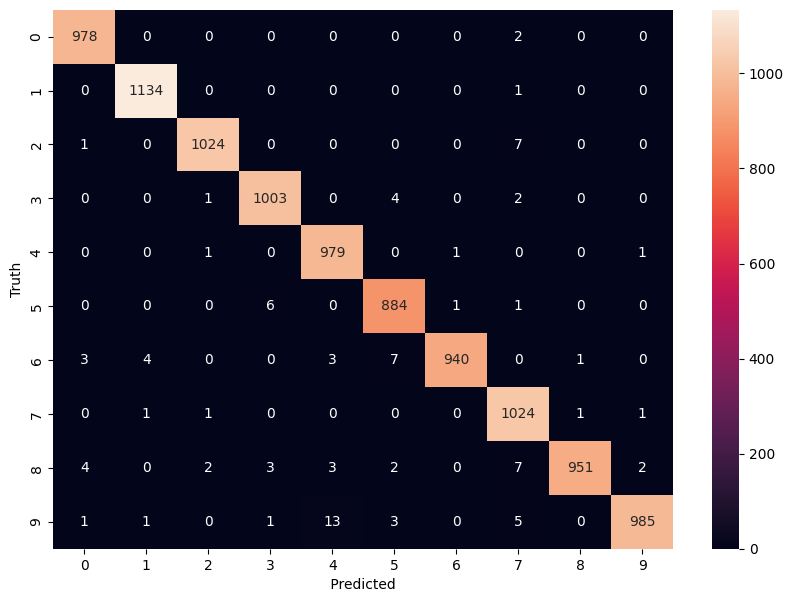

In [ ]:
y_predicted_cnn_numbers = cnn_numbers.predict(X_test)
y_predicted_labels_cnn_numbers = [np.argmax(i) for i in y_predicted_cnn_numbers]
cnn_numbers = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_cnn_numbers)

import seaborn as sn
plt.figure(figsize =(10, 7))
sn.heatmap(cnn_numbers, annot=True, fmt='d' )
plt.xlabel(' Predicted ')
plt.ylabel('Truth')

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir logs